# Section 7: Random Forest Regression

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.

These results from the various decision trees are aggregated, through model votes or averaging, into a single ensemble model that ends up outperforming any individual decision tree’s output.

![RandomForest](../media/RandomForest.png)

# Importing the libraries 

In [1]:
import numpy as np
import pandas as pd

# Load Data

In [2]:
dataset=pd.read_csv('../data/mushrooms.csv') 
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
# verify that there are no null columns in the dataset
dataset[dataset.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [5]:
y = dataset['class']
x = dataset.drop(['class'], axis=1)

In [6]:
print(x.head())

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                    

In [7]:
print(y.head())

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object


# Data Preprocessing

In [8]:
# use LabelEncoder to replace purchased (dependent variable) with 0 and 1 
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
print(y[:10])

[1 0 0 1 0 0 0 0 1 0]


In [9]:
x = pd.get_dummies(x)
print(x.head())

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0        False        False        False        False        False   
1        False        False        False        False        False   
2         True        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0         True          False          False           True          False   
1         True          False          False           True          False   
2        False          False          False           True          False   
3         True          False          False          False           True   
4         True          False          False           True          False   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...          True         False  

# Splitting the dataset into training and test set  

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state 


In [11]:
print(x_train.head())

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
5314        False        False        False        False        False   
2075        False        False        False        False        False   
5165        False        False         True        False        False   
1155         True        False        False        False        False   
4448        False        False        False        False        False   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
5314         True          False          False           True          False   
2075         True          False          False           True          False   
5165        False          False          False           True          False   
1155        False          False          False          False           True   
4448         True          False          False          False           True   

      ...  population_s  population_v  population_y  habitat_d  habitat_g 

In [12]:
print(x_test.head())

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
380         False        False        False        False        False   
3641        False        False         True        False        False   
273         False        False        False        False        False   
1029        False        False        False        False        False   
684         False        False        False        False        False   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
380          True          False          False          False           True   
3641        False          False          False          False           True   
273          True          False          False          False           True   
1029         True          False          False           True          False   
684          True           True          False          False          False   

      ...  population_s  population_v  population_y  habitat_d  habitat_g 

In [13]:
print(y_train[:10])

[1 0 1 0 1 0 1 0 0 1]


In [14]:
print(y_test[:10])

[1 0 0 0 0 0 1 1 0 1]


# Build Model 

In [15]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_train,y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
y_pred= regressor.predict(x_test)

# Evaluate Model 

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report

print("Random Forest Regression Model Performance")
print("R2 Score: ", r2_score(y_test,y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

Random Forest Regression Model Performance
R2 Score:  0.9997205546026301
Mean Absolute Error:  0.00020508613617719443
Mean Squared Error:  6.972928630024612e-05


# Plot the decision trees in the forest

[Text(0.6111111111111112, 0.9285714285714286, 'x[27] <= 0.5\nsquared_error = 0.249\nsamples = 3576\nvalue = 0.476'),
 Text(0.3888888888888889, 0.7857142857142857, 'x[53] <= 0.5\nsquared_error = 0.147\nsamples = 2027\nvalue = 0.821'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.2777777777777778, 0.6428571428571429, 'x[55] <= 0.5\nsquared_error = 0.069\nsamples = 1781\nvalue = 0.926'),
 Text(0.2222222222222222, 0.5, 'x[101] <= 0.5\nsquared_error = 0.026\nsamples = 1704\nvalue = 0.973'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[22] <= 0.5\nsquared_error = 0.012\nsamples = 1679\nvalue = 0.988'),
 Text(0.1111111111111111, 0.21428571428571427, 'x[25] <= 0.5\nsquared_error = 0.005\nsamples = 1670\nvalue = 0.995'),
 Text(0.05555555555555555, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1660\nvalue = 1.0'),
 Text(0.16666666666666666, 0.07142857142857142, 'squared_error = 0.0\nsamples = 10\nvalue = 0.0'),
 Text(0.2222222222222222, 0.21428571428571427, 'squared_error = 0.0

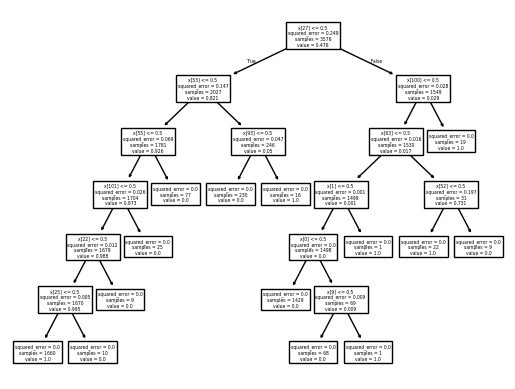

In [18]:
from sklearn.tree import plot_tree
plot_tree(regressor.estimators_[0])

[Text(0.5769230769230769, 0.9285714285714286, 'x[27] <= 0.5\nsquared_error = 0.25\nsamples = 3596\nvalue = 0.482'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[20] <= 0.5\nsquared_error = 0.138\nsamples = 2023\nvalue = 0.834'),
 Text(0.4807692307692307, 0.8571428571428572, 'True  '),
 Text(0.3076923076923077, 0.6428571428571429, 'x[53] <= 0.5\nsquared_error = 0.237\nsamples = 559\nvalue = 0.387'),
 Text(0.23076923076923078, 0.5, 'x[55] <= 0.5\nsquared_error = 0.234\nsamples = 344\nvalue = 0.628'),
 Text(0.15384615384615385, 0.35714285714285715, 'x[33] <= 0.5\nsquared_error = 0.135\nsamples = 263\nvalue = 0.838'),
 Text(0.07692307692307693, 0.21428571428571427, 'squared_error = 0.0\nsamples = 39\nvalue = 0.0'),
 Text(0.23076923076923078, 0.21428571428571427, 'squared_error = 0.0\nsamples = 224\nvalue = 1.0'),
 Text(0.3076923076923077, 0.35714285714285715, 'squared_error = 0.0\nsamples = 81\nvalue = 0.0'),
 Text(0.38461538461538464, 0.5, 'squared_error = 0.0\nsamples = 215\nvalue =

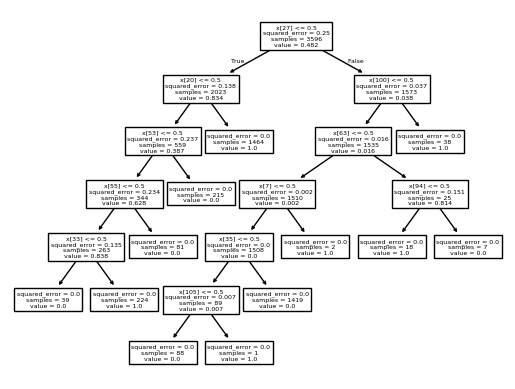

In [19]:
plot_tree(regressor.estimators_[5])